**Inport important Libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

**Defining the url containing the data set**

In [45]:
url = "https://www.worldometers.info/population/countries-in-africa-by-population/"

**Read the data in the url (head)**

In [43]:
# Get the webpage content
response = requests.get(url)

# Parse the content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table in the webpage using the correct class name
table = soup.find('table', {'class': 'table table-hover table-condensed table-list'})

# Check if a table was found
if table is not None:
    # Add your code here to process the table if found
    # Example: print the table's HTML content
    print(table)
else:
    print("No table found with the specified class on the webpage.")

No table found with the specified class on the webpage.


**Read the data in the url (tail)**

In [16]:
df.tail()

NameError: name 'df' is not defined

In [ ]:
df.shape

(58, 12)

In [ ]:
from tabulate import tabulate

# Display the cleaned-up DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='pretty'))

+----+----+--------------------------+--------------------+----------------+-------------+------------------+------------------+-----------------+-------------+-----------+--------------+--------------+
|    | #  | Country (or dependency)  | Population  (2024) | Yearly  Change | Net  Change | Density  (P/Km²) | Land Area  (Km²) | Migrants  (net) | Fert.  Rate | Med.  Age | Urban  Pop % | World  Share |
+----+----+--------------------------+--------------------+----------------+-------------+------------------+------------------+-----------------+-------------+-----------+--------------+--------------+
| 0  | 1  |         Nigeria          |     232679478      |     2.10 %     |   4796533   |       255        |      910770      |     -35202      |     4.4     |    18     |     54 %     |    2.85 %    |
| 1  | 2  |         Ethiopia         |     132059767      |     2.62 %     |   3368075   |       132        |     1000000      |      30069      |     3.9     |    19     |     22 %     | 

In [ ]:
df.describe()

,#,Population (2024),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
count,58.000000,5.800000e+01,5.800000e+01,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,29.500000,2.612312e+07,5.925918e+05,131.689655,5.111807e+05,-11108.120690,3.713793,21.413793
std,16.886879,3.987530e+07,9.126682e+05,175.534093,5.848486e+05,84518.921666,1.172559,6.808237
min,1.000000,5.237000e+03,-2.419000e+03,2.000000,3.750000e+02,-544257.000000,1.200000,14.000000
25%,15.250000,2.525592e+06,4.955050e+04,29.000000,2.868000e+04,-15323.000000,2.700000,18.000000
50%,29.500000,1.415218e+07,3.257065e+05,69.500000,2.698000e+05,-3515.000000,3.800000,19.000000
75%,43.750000,3.195727e+07,7.406598e+05,131.500000,8.140625e+05,82.000000,4.300000,22.000000
max,58.000000,2.326795e+08,4.796533e+06,871.000000,2.381740e+06,204040.000000,6.000000,51.000000


In [ ]:
df.columns

Index(['#', 'Country (or dependency)', 'Population  (2024)', 'Yearly  Change',
       'Net  Change', 'Density  (P/Km²)', 'Land Area  (Km²)',
       'Migrants  (net)', 'Fert.  Rate', 'Med.  Age', 'Urban  Pop %',
       'World  Share'],
      dtype='object')

In [ ]:
df2 =df[['Population  (2024)','Net  Change', 'Density  (P/Km²)', 'Land Area  (Km²)',
       'Migrants  (net)', 'Fert.  Rate', 'Med.  Age' ]]

In [ ]:
df2.head()

,Population (2024),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
0,232679478,4796533,255,910770,-35202,4.4,18
1,132059767,3368075,132,1000000,30069,3.9,19
2,116538258,2002486,117,995450,123884,2.7,24
3,109276265,3486534,48,2267050,-26968,6.0,16
4,68560157,1942551,77,885800,-29865,4.5,17


In [ ]:
df2.corr()

,Population (2024),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
Population (2024),1.000000,0.956441,-0.045547,0.479951,-0.034859,0.192832,-0.181702
Net Change,0.956441,1.000000,-0.058994,0.490796,0.038571,0.341173,-0.271655
Density (P/Km²),-0.045547,-0.058994,1.000000,-0.408421,0.005495,-0.101266,0.079323
Land Area (Km²),0.479951,0.490796,-0.408421,1.000000,-0.138140,0.319144,-0.191330
Migrants (net),-0.034859,0.038571,0.005495,-0.138140,1.000000,-0.070268,0.103557
Fert. Rate,0.192832,0.341173,-0.101266,0.319144,-0.070268,1.000000,-0.819347
Med. Age,-0.181702,-0.271655,0.079323,-0.191330,0.103557,-0.819347,1.000000


In [ ]:
# Renaming all columns to new names
new_column_names = [
    'Population_2024',
    'Net_Change',
    'Density_P_Km2',
    'Land_Area_Km2',
    'Migrants_net',
    'Fert_Rate',
    'Med_Age'
]

# Renaming columns in df2
df2.columns = new_column_names

# Verify the renaming
print(df2.columns)

Index(['Population_2024', 'Net_Change', 'Density_P_Km2', 'Land_Area_Km2',
       'Migrants_net', 'Fert_Rate', 'Med_Age'],
      dtype='object')


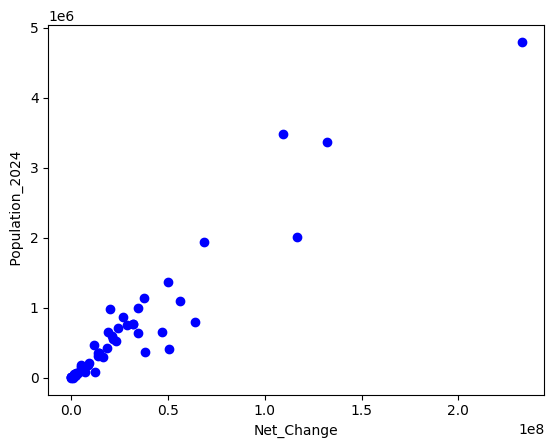

In [ ]:
plt.scatter(df2.Population_2024,df2.Net_Change, color = "blue" )
plt.ylabel(" Population_2024")
plt.xlabel("Net_Change")
plt.show()

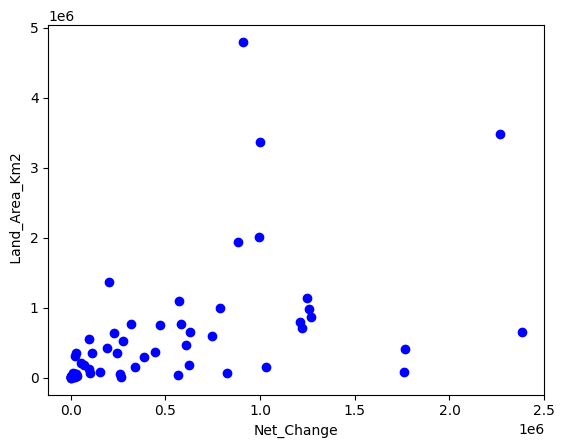

In [ ]:
plt.scatter(df2.Land_Area_Km2,df2.Net_Change, color = "blue" )
plt.ylabel(" Land_Area_Km2")
plt.xlabel("Net_Change")
plt.show()

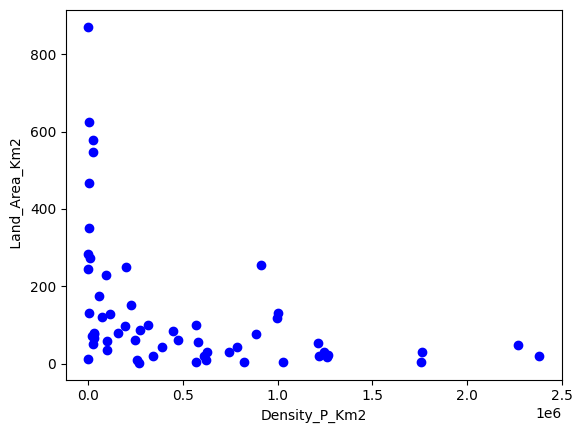

In [ ]:
plt.scatter(df2.Land_Area_Km2,df2.Density_P_Km2, color = "blue" )
plt.ylabel(" Land_Area_Km2")
plt.xlabel("Density_P_Km2")
plt.show()

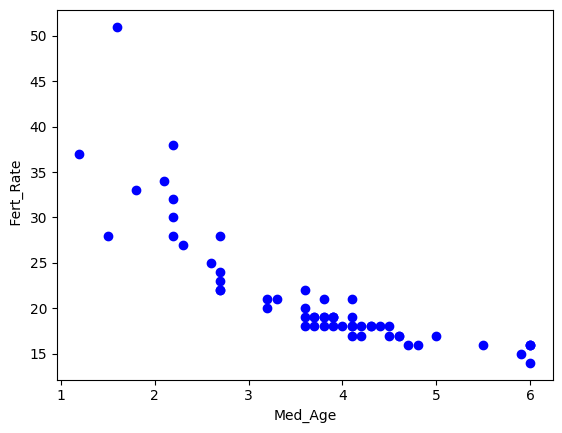

In [ ]:
plt.scatter(df2.Fert_Rate,df2.Med_Age, color = "blue" )
plt.ylabel(" Fert_Rate")
plt.xlabel("Med_Age")
plt.show()

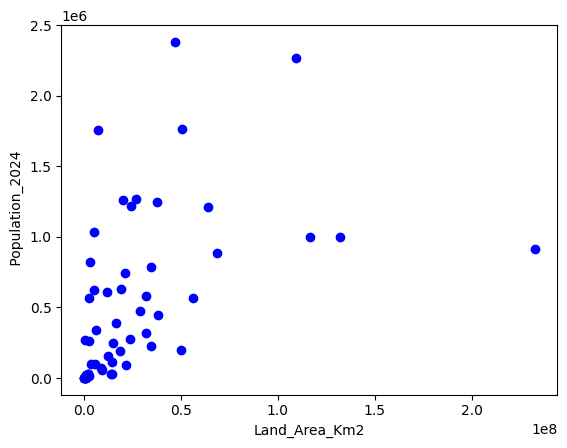

In [ ]:
plt.scatter(df2.Population_2024,df2.Land_Area_Km2, color = "blue" )
plt.ylabel(" Population_2024")
plt.xlabel("Land_Area_Km2")
plt.show()

**Create a machine to test the dataset**

In [ ]:
msk =np.random.rand(len(df))<0.8
train =df2[msk]
test = df2[~msk]

**Modellimng: Y = A+BX**


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x =np.asanyarray(train[['Net_Change']])
train_y = np.asanyarray(train[['Population_2024']])
regr.fit(train_x, train_y)

print("coefficients:" , regr.coef_)
print("intercept:", regr.intercept_)

coefficients: [[32.71633517]]
intercept: [3898266.9063351]


Population_2024 = 3898267+ 32.7* Net_Change

**Ploting a straight line**

Text(0, 0.5, 'Population_2024')

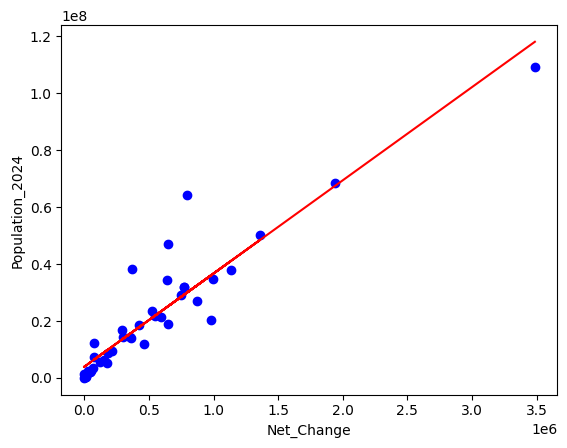

In [ ]:
plt.scatter(train.Net_Change,train.Population_2024, color = "blue" )
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Net_Change")
plt.ylabel("Population_2024")

**EVALUATION**

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Net_Change']])
test_y = np.asanyarray(test[['Population_2024']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 16103798.26
Residual sum of squares (MSE): 704840224346481.88
R2-score: 0.69


**The model is 69% accurate showing that simple linear Regression may not be the best model to predict Population_2024 . Thus, we need to explore Multiple linear Regression too.**

**MULTIPLE LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()
ln

LinearRegression()

In [ ]:
Z = df2[['Population_2024','Density_P_Km2','Land_Area_Km2','Fert_Rate']]

In [ ]:
ln.fit(Z, df2['Net_Change'])

LinearRegression()

**The intercept**

In [ ]:
ln.intercept_

np.float64(-428729.598487852)

**The coeficient**

In [ ]:
ln.coef_

array([ 2.12604588e-02, -1.93657588e+01, -1.41511689e-02,  1.28094380e+05])

**Multiple Regression Model**

Net_Change =  -428729.5 + 2.13 Population_2024 + -1.94Density_P_Km2 + -1.42Land_Area_Km2 + 1.28Fert_Rate

In [ ]:
Y_hat=ln.predict(Z)
Y_hat[0:5]

array([5063931.40024711, 2861782.26950519, 2378429.48524618,
       2630089.24671735, 1591289.23532407])

**Drawing Graphs**

<ipython-input-63-2910206283f5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df2['Net_Change'],hist=False,color="r",label="Actual Value")


NameError: name 'yhat' is not defined

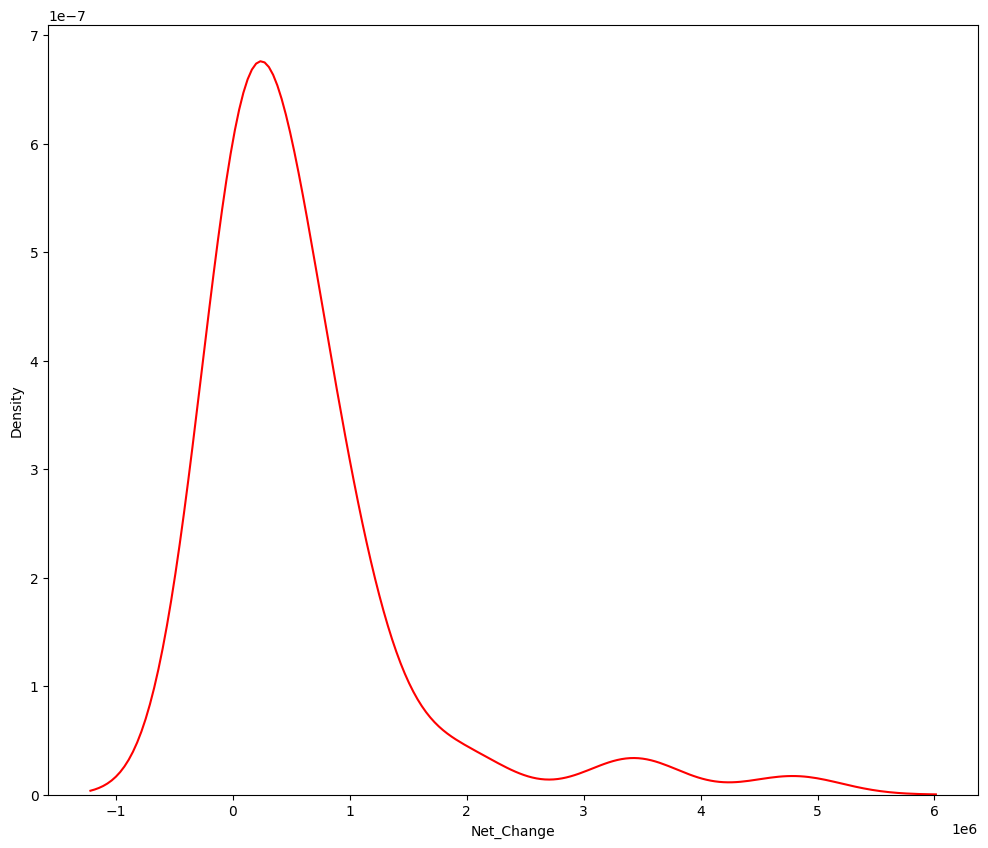

In [ ]:
import seaborn as sns
width=12
height=10
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df2['Net_Change'],hist=False,color="r",label="Actual Value")
sns.distplot(yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title('Actual vs Fitted Values for Net_Change')
plt.xlabel('Net_Change')
plt.ylabel('Population_2024')

plt.show()
plt.close()